# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Fettleibigkeit bei Erwachsene
### 1.2 Fragestellung:
-   Wie hoch ist der prozentuale Anteil der Erwachsenen ab 18 Jahren, die basierend auf gemessener Körpergröße und Gewicht einen BMI von 30 kg/m² oder höher aufweisen?
- Wie hat sich der durchschnittliche BMI-Wert bei Männern und Frauen weltweit über die letzten Jahre entwickelt?
- Welche Länder haben die höchsten und niedrigsten durchschnittlichen Fettleibigkeitsraten?
### 1.3 Datenquelle(n):
- https://ourworldindata.org/grapher/share-of-adults-defined-as-obese?tab=table 
- https://ourworldindata.org/grapher/mean-body-mass-index-bmi-in-adult-women
- https://ourworldindata.org/grapher/mean-body-mass-index-bmi-in-adult-males




### 1.4 Daten beschaffen und laden

In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import sys
!{sys.executable} -m pip install pandas

In [3]:
import pandas as pd 
df = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1, 
                 names=['Gebiet', 'Code', 'Jahr', 'Fettleibigkeit'])
df.head()

,Gebiet,Code,Jahr,Fettleibigkeit
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


In [4]:
import pandas as pd 
df2 =pd.read_csv('mean-body-mass-index-bmi-in-adult-women.csv', skiprows=1, 
                 names=['Gebiet', 'Code', 'Jahr', 'Woman BMI'])
df2.head()

,Gebiet,Code,Jahr,Woman BMI
0,Afghanistan,AFG,1975,18.844326
1,Afghanistan,AFG,1976,18.986417
2,Afghanistan,AFG,1977,19.128086
3,Afghanistan,AFG,1978,19.269247
4,Afghanistan,AFG,1979,19.409477


In [5]:
import pandas as pd 
df3 =pd.read_csv('mean-body-mass-index-bmi-in-adult-males.csv', skiprows=1, 
                 names=['Gebiet', 'Code', 'Jahr', 'Man BMI'])
df3.head()

,Gebiet,Code,Jahr,Man BMI
0,Afghanistan,AFG,1975,18.999440
1,Afghanistan,AFG,1976,19.105518
2,Afghanistan,AFG,1977,19.212080
3,Afghanistan,AFG,1978,19.319053
4,Afghanistan,AFG,1979,19.425952


## 2. Daten vorbereiten 
Der Datensatz enthält die folgenden Spalten:
- Gebiet: Länder oder Regionen (z.B. AFG, AGO, ALB)
- Jahr: Die Zeitspanne von 1975 bis 2016 (42 Jahre).
- Fettleibigkeit: Der Anteil der Erwachsenen (in Prozent), die einen BMI von 30 oder höher haben.

Nach dem Pivotieren wurde der Datensatz in das Wide-Format umgewandelt:
- Die "Gebiete" bilden die Zeilen (Index).
- Die "Jahre" bilden die Spalten (Columns).
- Die Werte in der Tabelle sind die Fettleibigkeitsraten

In [6]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Fettleibigkeit')
df_pivot.head()

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,...,2.8,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5
Africa (WHO),1.7,1.8,1.9,1.9,2.0,2.1,2.2,2.3,2.4,2.5,...,6.6,6.8,7.1,7.4,7.6,7.9,8.2,8.5,8.8,9.1
Albania,5.7,5.8,6.0,6.1,6.3,6.4,6.6,6.8,7.0,7.2,...,16.9,17.5,18.1,18.7,19.3,19.9,20.5,21.1,21.7,22.3
Algeria,5.9,6.1,6.2,6.4,6.7,6.9,7.2,7.4,7.8,8.1,...,19.2,19.9,20.7,21.4,22.2,23.1,23.9,24.8,25.7,26.6
Americas (WHO),9.0,9.3,9.5,9.8,10.1,10.4,10.7,11.1,11.4,11.8,...,23.8,24.4,25.0,25.5,26.1,26.7,27.3,27.8,28.4,29.0


In [7]:
df2_pivot = df2.pivot(index='Gebiet', columns='Jahr', values='Woman BMI')
df2_pivot.head()

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.844326,18.986417,19.128086,19.269247,19.409477,19.549231,19.687040,19.823152,19.957774,20.091160,...,23.083310,23.211125,23.339148,23.466950,23.594785,23.722965,23.851327,23.979135,24.106899,24.234135
Albania,23.890636,23.938773,23.987401,24.036154,24.084969,24.133737,24.182737,24.232111,24.281292,24.330109,...,25.739934,25.830620,25.920286,26.008601,26.095482,26.181051,26.265137,26.347663,26.428652,26.507512
Algeria,22.538677,22.639106,22.742890,22.849269,22.957815,23.068339,23.182681,23.300166,23.420056,23.540961,...,25.885735,25.962253,26.039461,26.116206,26.191877,26.266865,26.341576,26.415817,26.489409,26.561166
American Samoa,32.258886,32.403470,32.547337,32.689690,32.830923,32.971094,33.113047,33.255976,33.398543,33.539776,...,35.216997,35.209839,35.201827,35.193207,35.184742,35.176889,35.169352,35.162019,35.155108,35.148865
Andorra,25.886079,25.974234,26.052990,26.124174,26.189526,26.250746,26.305611,26.355479,26.401501,26.444075,...,26.592701,26.566990,26.537845,26.504479,26.467753,26.428973,26.389177,26.349161,26.309603,26.271661


In [8]:
df3_pivot = df3.pivot(index='Gebiet', columns='Jahr', values='Man BMI')
df3_pivot.head()

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.999440,19.105518,19.212080,19.319053,19.425952,19.532923,19.637998,19.741670,19.843253,19.943436,...,21.947270,22.024802,22.102958,22.181569,22.261850,22.343871,22.427785,22.512386,22.597279,22.682456
Albania,23.875925,23.941722,24.008033,24.074598,24.141122,24.207604,24.274263,24.340757,24.406364,24.471048,...,26.190414,26.296948,26.403417,26.509911,26.617041,26.725178,26.835242,26.947170,27.060838,27.174471
Algeria,21.316564,21.393173,21.471962,21.552533,21.635379,21.720052,21.807475,21.897452,21.989065,22.082530,...,24.071011,24.153304,24.239442,24.327934,24.417648,24.507803,24.597742,24.687904,24.777254,24.865386
American Samoa,29.027740,29.308375,29.588662,29.869139,30.148287,30.424760,30.699517,30.971502,31.238396,31.498266,...,33.356398,33.320390,33.285217,33.250466,33.217207,33.185128,33.154075,33.124245,33.095257,33.066721
Andorra,25.124438,25.229178,25.328827,25.424956,25.518640,25.610347,25.698717,25.784539,25.868009,25.949672,...,27.383837,27.414716,27.437915,27.453550,27.462931,27.467571,27.469886,27.472020,27.474622,27.478395


In [9]:
# Wide-Format zurück ins Long-Format
df_long = df_pivot.reset_index().melt(id_vars='Gebiet', var_name='Jahr', value_name='Fettleibigkeit')
print(df_long.head())


           Gebiet  Jahr  Fettleibigkeit
0     Afghanistan  1975             0.4
1    Africa (WHO)  1975             1.7
2         Albania  1975             5.7
3         Algeria  1975             5.9
4  Americas (WHO)  1975             9.0


In [10]:
df2_long = df2_pivot.reset_index().melt(id_vars='Gebiet', var_name='Jahr', value_name='Woman BMI')
print(df2_long.head())


           Gebiet  Jahr  Woman BMI
0     Afghanistan  1975  18.844326
1         Albania  1975  23.890636
2         Algeria  1975  22.538677
3  American Samoa  1975  32.258886
4         Andorra  1975  25.886079


In [11]:
df3_long = df3_pivot.reset_index().melt(id_vars='Gebiet', var_name='Jahr', value_name='Man BMI')
print(df3_long.head())


           Gebiet  Jahr    Man BMI
0     Afghanistan  1975  18.999440
1         Albania  1975  23.875925
2         Algeria  1975  21.316564
3  American Samoa  1975  29.027740
4         Andorra  1975  25.124438


In [12]:
df_pivot_table = df.pivot_table(index='Gebiet', columns='Jahr', values='Fettleibigkeit', aggfunc='mean')
print(df_pivot_table.head())


Jahr            1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
Gebiet                                                                       
Afghanistan      0.4   0.4   0.5   0.5   0.5   0.6   0.6   0.6   0.7   0.7   
Africa (WHO)     1.7   1.8   1.9   1.9   2.0   2.1   2.2   2.3   2.4   2.5   
Albania          5.7   5.8   6.0   6.1   6.3   6.4   6.6   6.8   7.0   7.2   
Algeria          5.9   6.1   6.2   6.4   6.7   6.9   7.2   7.4   7.8   8.1   
Americas (WHO)   9.0   9.3   9.5   9.8  10.1  10.4  10.7  11.1  11.4  11.8   

Jahr            ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Gebiet          ...                                                         
Afghanistan     ...   2.8   2.9   3.1   3.3   3.5   3.7   3.9   4.1   4.3   
Africa (WHO)    ...   6.6   6.8   7.1   7.4   7.6   7.9   8.2   8.5   8.8   
Albania         ...  16.9  17.5  18.1  18.7  19.3  19.9  20.5  21.1  21.7   
Algeria         ...  19.2  19.9  20.7  21.4  22.2  23.1  23.9  24.8 

In [13]:
df2_pivot_table = df2.pivot_table(index='Gebiet', columns='Jahr', values='Woman BMI', aggfunc='mean')
print(df2_pivot_table.head())

Jahr                 1975       1976       1977       1978       1979  \
Gebiet                                                                  
Afghanistan     18.844326  18.986417  19.128086  19.269247  19.409477   
Albania         23.890636  23.938773  23.987401  24.036154  24.084969   
Algeria         22.538677  22.639106  22.742890  22.849269  22.957815   
American Samoa  32.258886  32.403470  32.547337  32.689690  32.830923   
Andorra         25.886079  25.974234  26.052990  26.124174  26.189526   

Jahr                 1980       1981       1982       1983       1984  ...  \
Gebiet                                                                 ...   
Afghanistan     19.549231  19.687040  19.823152  19.957774  20.091160  ...   
Albania         24.133737  24.182737  24.232111  24.281292  24.330109  ...   
Algeria         23.068339  23.182681  23.300166  23.420056  23.540961  ...   
American Samoa  32.971094  33.113047  33.255976  33.398543  33.539776  ...   
Andorra         26.2

In [14]:
df3_pivot_table = df3.pivot_table(index='Gebiet', columns='Jahr', values='Man BMI', aggfunc='mean')
print(df3_pivot_table.head())

Jahr                 1975       1976       1977       1978       1979  \
Gebiet                                                                  
Afghanistan     18.999440  19.105518  19.212080  19.319053  19.425952   
Albania         23.875925  23.941722  24.008033  24.074598  24.141122   
Algeria         21.316564  21.393173  21.471962  21.552533  21.635379   
American Samoa  29.027740  29.308375  29.588662  29.869139  30.148287   
Andorra         25.124438  25.229178  25.328827  25.424956  25.518640   

Jahr                 1980       1981       1982       1983       1984  ...  \
Gebiet                                                                 ...   
Afghanistan     19.532923  19.637998  19.741670  19.843253  19.943436  ...   
Albania         24.207604  24.274263  24.340757  24.406364  24.471048  ...   
Algeria         21.720052  21.807475  21.897452  21.989065  22.082530  ...   
American Samoa  30.424760  30.699517  30.971502  31.238396  31.498266  ...   
Andorra         25.6

## 3. Statistik der Rohdaten (Analyse im Long-Format)
1. Variablenanalyse
- Die Variable "Fettleibigkeit" ist kontinuierlich, da sie Dezimalwerte enthält.
- Die Variablen "Jahr" und "Code/Gebiet" sind diskret mit einer festen Anzahl von Kategorien:
   - Jahr: 42 einzigartige Werte (1975–2016)
   - Gebiet: 191 verschiedene Länder/Regionen
2. Anzahl der Datenpunkte
- Für jede Region (Gebiet) und jedes Jahr sind 197 Datenpunkte vorhanden.
- Es gibt keine fehlenden Werte in den Spalten "Jahr" und "Fettleibigkeit". In der Spalte "Code" sind einige Werte fehlend, dies hat jedoch die Analyse nicht beeinträchtigt.
3. Verteilung der Variablen
- Das Histogramm der Fettleibigkeitswerte zeigt eine rechtsschiefe Verteilung:
   - Der Mittelwert liegt bei 11.87%.
   - Der Median beträgt 10.10%, was zeigt, dass die Mehrheit der Länder geringere Fettleibigkeitswerte aufweist.
   - Regionen mit besonders hohen Durchschnittswerten (z.B. Pazifikstaaten) ziehen den Mittelwert nach oben.
4. Datenpunkte pro Klasse
- Jede Region verfügt über 42 Datenpunkte (ein Punkt pro Jahr zwischen 1975 und 2016).
- Die Daten sind gleichmässig verteilt, was eine zuverlässige Analyse der zeitlichen Entwicklung ermöglicht.
5. Zusammenhänge zwischen Variablen
- Erste visuelle Analysen zeigen, dass der Anteil der Fettleibigkeit in vielen Ländern über die Zeit gestiegen ist.



In [15]:
df.dtypes

Gebiet             object
Code               object
Jahr                int64
Fettleibigkeit    float64
dtype: object

In [16]:
df2.dtypes

Gebiet        object
Code          object
Jahr           int64
Woman BMI    float64
dtype: object

In [17]:
df3.dtypes

Gebiet      object
Code        object
Jahr         int64
Man BMI    float64
dtype: object

### 3.1 Analyse Gebiete

1. Anzahl der verschiedenen Gebiete: 
- Insgesamt gibt es 191 einzigartige Gebiete (Länder oder Regionen) in den Daten. 
2. Anzahl der Datenpunkte pro Gebiet:
- Die Datenpunkte sind gleichmässig auf die meisten Gebiete verteilt, wobei jedes Gebiet 42 Datenpunkte enthält. Dies legt nahe, dass für jedes Jahr (von 1975 bis 2016) Daten für jedes Gebiet erfasst wurden.
3. Visualisierung der Datenpunkte:
- Die Top 10 Gebiete mit der höchsten Anzahl an Datenpunkten sind in einem horizontalen Balkendiagramm dargestellt. Hier zeigt sich, dass alle Gebiete in den Top 10 die gleiche Anzahl an Datenpunkten (42) aufweisen.
- Das zweite Diagramm zeigt die Anzahl der Datenpunkte für alle Gebiete in einem Balkendiagramm. Es bestätigt die gleichmäßige Verteilung der Datenpunkte über die Gebiete.

In [18]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  197


In [19]:
print("Anzahl verschiedener Gebiete: ", len(df2["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  210


In [20]:
print("Anzahl verschiedener Gebiete: ", len(df3["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  210


In [21]:
# Anzahl Datenpunkte pro Gebiet
df["Gebiet"].value_counts()

Gebiet
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

In [22]:
# Anzahl Datenpunkte pro Gebiet df2
df2["Gebiet"].value_counts()


Gebiet
Afghanistan    42
Rwanda         42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Ghana          42
Greece         42
Greenland      42
Grenada        42
Zimbabwe       42
Name: count, Length: 210, dtype: int64

In [23]:
# Anzahl Datenpunkte pro Gebiet df3
df3["Gebiet"].value_counts()

Gebiet
Afghanistan    42
Rwanda         42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Ghana          42
Greece         42
Greenland      42
Grenada        42
Zimbabwe       42
Name: count, Length: 210, dtype: int64

<Axes: xlabel='Anzahl', ylabel='Gebiet'>

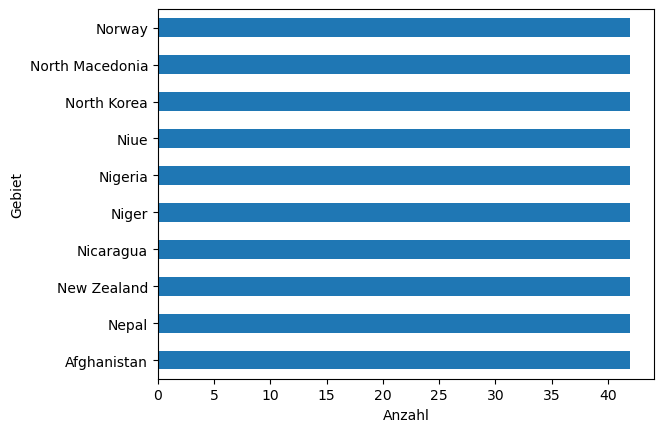

In [24]:
df["Gebiet"].value_counts().head(10).plot(kind="barh" , xlabel="Anzahl")
# das gleiche gilt für df2 und df3, da beide 42 Datenpunkte haben

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

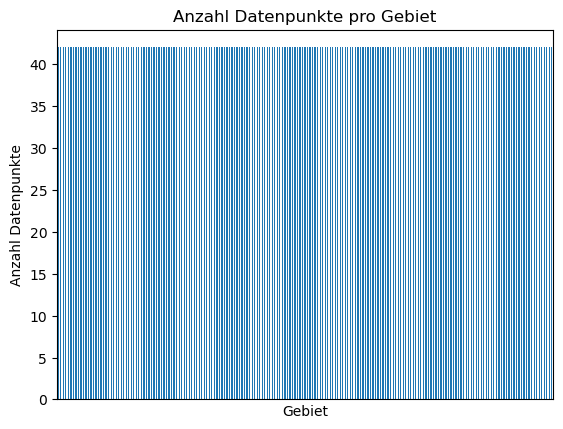

In [25]:
df["Gebiet"].value_counts().plot(kind="bar",
                                 xticks=[],     # disable labels on x-axis
                                 ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Gebiet")
# gleiche gilt für df2 und df3

In [26]:
# Liste aller Länder (ohne Duplikate)
country_list = list(df['Gebiet'].unique())
print(country_list)


['Afghanistan', 'Africa (WHO)', 'Albania', 'Algeria', 'Americas (WHO)', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Eastern Mediterranean (WHO)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe (WHO)', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'G

In [27]:
# Liste aller Länder (ohne Duplikate)
country_list = list(df2['Gebiet'].unique())
print(country_list)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Central Asia, Middle East and North Africa', 'Central and Eastern Europe', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'East and South East Asia', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 

In [28]:
# Liste aller Länder (ohne Duplikate)
country_list = list(df3['Gebiet'].unique())
print(country_list)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Central Asia, Middle East and North Africa', 'Central and Eastern Europe', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'East and South East Asia', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 

### 3.2 Analyse Codes

1. Anzahl verschiedener Codes:
- Es gibt insgesamt 191 verschiedene Codes, die den jeweiligen Ländern oder Regionen zugeordnet sind.
2. Anzahl der Datenpunkte pro Code:
- Die Verteilung der Datenpunkte zeigt, dass jeder Code (Ländercode) 42 Datenpunkte hat. Dies entspricht den 42 Jahren (von 1975 bis 2016) für jedes Land oder jede Region.
3. Visualisierung der Datenpunkte:
- Das Balkendiagramm bestätigt die gleichmässige Verteilung der Datenpunkte über alle Codes.
- Jeder Code hat exakt 42 Einträge, was auf eine konsistente Datenerfassung hinweist.

In [29]:
print("Anzahl verschiedener Codes:", len(df["Code"].unique()))

Anzahl verschiedener Codes: 191


In [24]:
print("Anzahl verschiedener Codes:", len(df2["Code"].unique()))

Anzahl verschiedener Codes: 202


In [27]:
print("Anzahl verschiedener Codes:", len(df3["Code"].unique()))

Anzahl verschiedener Codes: 202


In [31]:
# Anzahl Datenpunkte pro Gebiet
df["Code"].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

In [ ]:
# Anzahl Datenpunkte pro Gebiet, gleiche gilt für df3
df2["Code"].value_counts()

Code
AFG    42
PSE    42
NIC    42
NER    42
NGA    42
       ..
GHA    42
GRC    42
GRL    42
GRD    42
ZWE    42
Name: count, Length: 201, dtype: int64

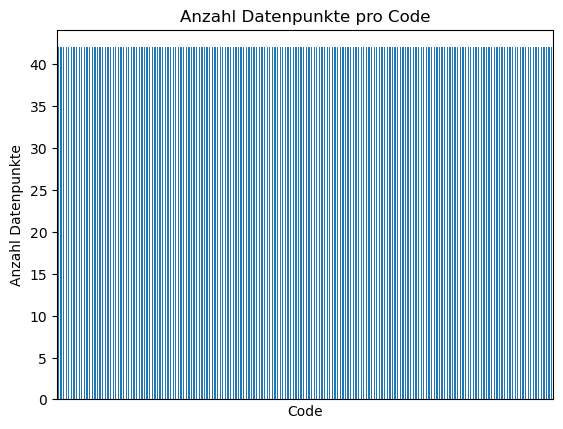

In [ ]:
df["Code"].value_counts().plot(kind="bar", xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Code");
#diagramm gleich für df2 und df3

### 3.3 Analyse Jahr

1. Anzahl der verschiedenen Jahre:
- Die Daten umfassen insgesamt 42 einzigartige Jahre von 1975 bis 2016.
2. Anzahl der Datenpunkte pro Jahr:
- Jedes Jahr enthält 197 Datenpunkte, was auf eine vollständige und gleichmässige Verteilung der Daten für alle Länder und Regionen hinweist.
3. Visualisierung der Datenpunkte:
- Das Diagramm zeigt eine konstante Anzahl von Datenpunkten über die gesamten 42 Jahre hinweg.
- Die rote Linie bei 2016 markiert das letzte Jahr der Daten.

In [33]:
print("Anzahl verschiedener Jahre:", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [27]:
print("Anzahl verschiedener Jahre:", len(df2["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [28]:
print("Anzahl verschiedener Jahre:", len(df3["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [ ]:
# Anzahl Datenpunkte pro Jahr
df["Jahr"].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

In [29]:
# Anzahl Datenpunkte pro Jahr
df2["Jahr"].value_counts().sort_index()

Jahr
1975    210
1976    210
1977    210
1978    210
1979    210
1980    210
1981    210
1982    210
1983    210
1984    210
1985    210
1986    210
1987    210
1988    210
1989    210
1990    210
1991    210
1992    210
1993    210
1994    210
1995    210
1996    210
1997    210
1998    210
1999    210
2000    210
2001    210
2002    210
2003    210
2004    210
2005    210
2006    210
2007    210
2008    210
2009    210
2010    210
2011    210
2012    210
2013    210
2014    210
2015    210
2016    210
Name: count, dtype: int64

In [29]:
# Anzahl Datenpunkte pro Jahr
df3["Jahr"].value_counts().sort_index()

Jahr
1975    210
1976    210
1977    210
1978    210
1979    210
1980    210
1981    210
1982    210
1983    210
1984    210
1985    210
1986    210
1987    210
1988    210
1989    210
1990    210
1991    210
1992    210
1993    210
1994    210
1995    210
1996    210
1997    210
1998    210
1999    210
2000    210
2001    210
2002    210
2003    210
2004    210
2005    210
2006    210
2007    210
2008    210
2009    210
2010    210
2011    210
2012    210
2013    210
2014    210
2015    210
2016    210
Name: count, dtype: int64

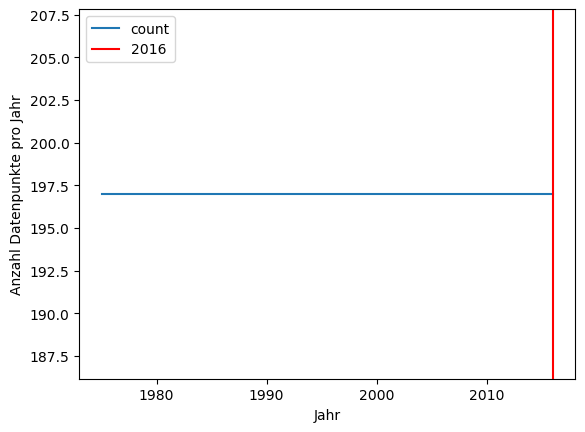

In [ ]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte pro Jahr");
g.axvline(x=2016, color="red", label="2016") # rote Linie bei 2016 - ab sind alle Jahre enthalten
g.legend()  # Legende anzeigen

#gleiche gilt für df2 und df3, einfach ist die Linie bei 210

In [36]:
df.describe()

,Jahr,Fettleibigkeit
count,8274.000000,8274.000000
mean,1995.500000,11.866594
std,12.121651,9.696335
min,1975.000000,0.100000
25%,1985.000000,3.900000
50%,1995.500000,10.100000
75%,2006.000000,17.700000
max,2016.000000,60.700000


In [ ]:
df2.describe()

,Jahr,Woman BMI
count,8820.000000,8820.000000
mean,1995.500000,24.777447
std,12.121606,2.964798
min,1975.000000,16.399592
25%,1985.000000,22.855210
50%,1995.500000,24.898169
75%,2006.000000,26.468957
max,2016.000000,35.224032


In [30]:
df3.describe()

,Jahr,Man BMI
count,8820.000000,8820.000000
mean,1995.500000,24.080696
std,12.121606,2.717279
min,1975.000000,17.634594
25%,1985.000000,22.034299
50%,1995.500000,24.288264
75%,2006.000000,25.879535
max,2016.000000,33.556548


### 3.4 Analyse Fettleibigkeit

1. Histogramm der Fettleibigkeitsverteilung:
 - Das Histogramm zeigt die Verteilung der Fettleibigkeitswerte über alle Länder und Jahre.
 - Die meisten Datenpunkte liegen zwischen 0% und 20%, was darauf hinweist, dass in vielen Regionen der Anteil an fettleibigen Erwachsenen relativ niedrig ist.
 - Der Mittelwert liegt bei 11.87% (rote Linie), während der Median bei 10.10% (orange Linie) liegt.
 - Der Unterschied zwischen Mittelwert und Median zeigt, dass die Verteilung rechtsschief ist, d.h., es gibt einige Regionen mit deutlich höheren Werten, die den Mittelwert anheben.
2. Durchschnittliche Fettleibigkeitswerte pro Gebiet:
 - Die Top 10 Regionen mit den höchsten durchschnittlichen Fettleibigkeitswerten sind dargestellt.
 - An der Spitze stehen Länder wie NRU (Nauru) und PLW (Palau) mit durchschnittlichen Werten von über 50%.
 - Diese Länder befinden sich vor allem in der pazifischen Region, wo Fettleibigkeit traditionell ein großes Problem darstellt.

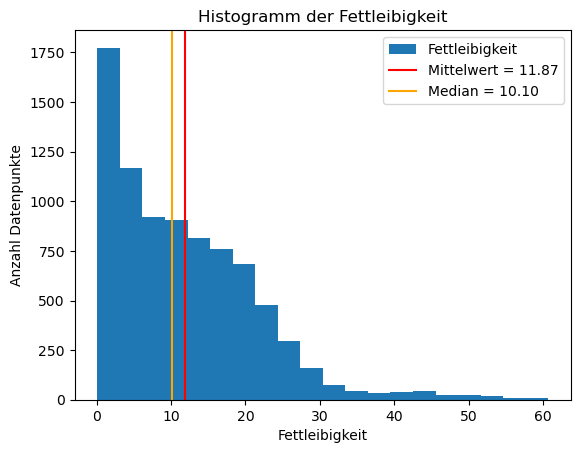

In [30]:
g = df['Fettleibigkeit'].plot(kind='hist', bins=20, title='Histogramm der Fettleibigkeit', 
                           xlabel='Fettleibigkeit', ylabel='Anzahl Datenpunkte')
mean = df['Fettleibigkeit'].mean()
g.axvline(x=df['Fettleibigkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Fettleibigkeit'].median()
g.axvline(x=df['Fettleibigkeit'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

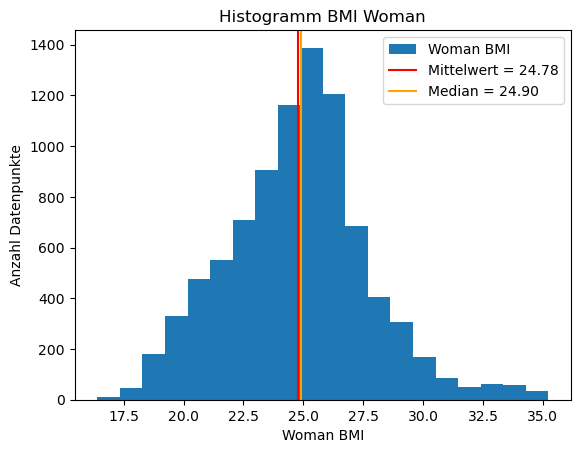

In [31]:
g = df2['Woman BMI'].plot(kind='hist', bins=20, title='Histogramm BMI Woman', 
                           xlabel='Woman BMI', ylabel='Anzahl Datenpunkte')
mean = df2['Woman BMI'].mean()
g.axvline(x=df2['Woman BMI'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df2['Woman BMI'].median()
g.axvline(x=df2['Woman BMI'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

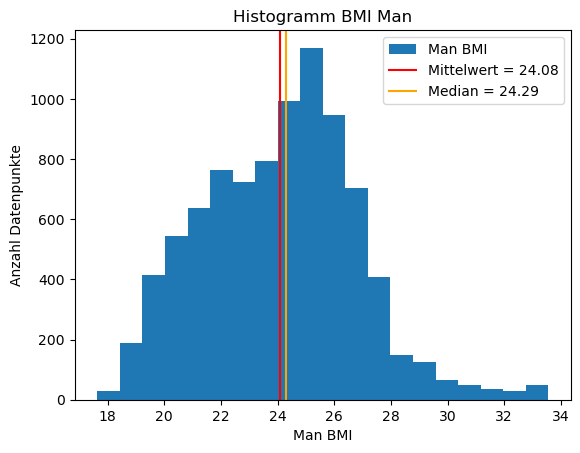

In [32]:
g = df3['Man BMI'].plot(kind='hist', bins=20, title='Histogramm BMI Man', 
                           xlabel='Man BMI', ylabel='Anzahl Datenpunkte')
mean = df3['Man BMI'].mean()
g.axvline(x=df3['Man BMI'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df3['Man BMI'].median()
g.axvline(x=df3['Man BMI'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

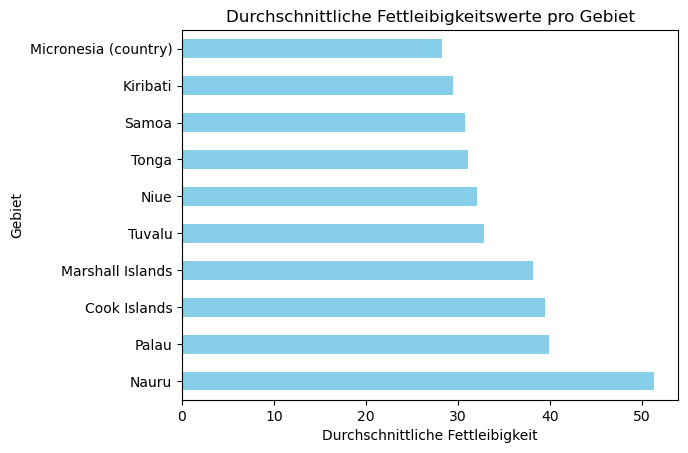

In [39]:
gebiet_avg = df.groupby('Gebiet')['Fettleibigkeit'].mean()
gebiet_avg = gebiet_avg.sort_values(ascending=False).head(10)
gebiet_avg.plot(kind="barh", xlabel="Durchschnittliche Fettleibigkeit", ylabel="Gebiet", title="Durchschnittliche Fettleibigkeitswerte pro Gebiet", color='skyblue')
plt.show()

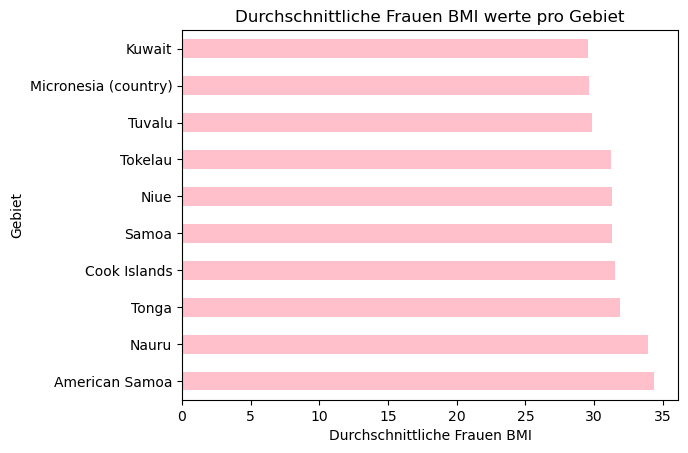

In [34]:
gebiet_avg = df2.groupby('Gebiet')['Woman BMI'].mean()
gebiet_avg = gebiet_avg.sort_values(ascending=False).head(10)
gebiet_avg.plot(kind="barh", xlabel="Durchschnittliche Frauen BMI", ylabel="Gebiet", title="Durchschnittliche Frauen BMI werte pro Gebiet", color='pink')
plt.show()

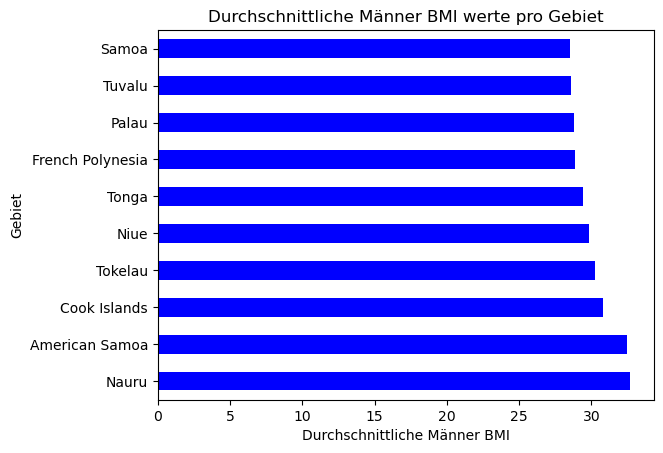

In [34]:
gebiet_avg = df3.groupby('Gebiet')['Man BMI'].mean()
gebiet_avg = gebiet_avg.sort_values(ascending=False).head(10)
gebiet_avg.plot(kind="barh", xlabel="Durchschnittliche Männer BMI", ylabel="Gebiet", title="Durchschnittliche Männer BMI werte pro Gebiet", color='blue')
plt.show()

In [33]:
print(df.groupby('Gebiet')['Fettleibigkeit'].describe())

                       count       mean       std  min     25%    50%     75%  \
Gebiet                                                                          
Afghanistan             42.0   1.795238  1.209304  0.4   0.800   1.45   2.575   
Africa (WHO)            42.0   4.609524  2.230477  1.7   2.625   4.20   6.325   
Albania                 42.0  12.016667  5.177857  5.7   7.475  10.80  16.050   
Algeria                 42.0  13.871429  6.168618  5.9   8.500  12.75  18.425   
Americas (WHO)          42.0  17.869048  6.231137  9.0  12.300  17.25  23.075   
...                      ...        ...       ...  ...     ...    ...     ...   
Vietnam                 42.0   0.630952  0.551489  0.1   0.200   0.40   0.875   
Western Pacific (WHO)   42.0   2.585714  1.767259  0.7   1.125   2.00   3.750   
Yemen                   42.0   6.788095  3.377559  2.5   3.850   6.20   9.125   
Zambia                  42.0   3.252381  1.408032  1.3   2.225   2.95   4.050   
Zimbabwe                42.0

In [34]:
print(df2.groupby('Gebiet')['Woman BMI'].describe())

                count       mean       std        min        25%        50%  \
Gebiet                                                                        
Afghanistan      42.0  21.575095  1.604263  18.844326  20.255724  21.571322   
Albania          42.0  25.016024  0.777768  23.890636  24.389408  24.858454   
Algeria          42.0  24.722424  1.235923  22.538677  23.692809  24.844411   
American Samoa   42.0  34.386760  0.957883  32.258886  33.712654  34.847088   
Andorra          42.0  26.476417  0.204516  25.886079  26.363903  26.550952   
...               ...        ...       ...        ...        ...        ...   
Vietnam          42.0  19.697406  1.194036  17.833475  18.707643  19.602740   
World            42.0  23.408095  0.797147  22.077702  22.752654  23.394156   
Yemen            42.0  21.797903  1.509498  19.239252  20.519763  21.835744   
Zambia           42.0  22.317811  0.901664  20.525578  21.696044  22.348568   
Zimbabwe         42.0  24.692756  0.454663  23.85344

In [36]:
print(df3.groupby('Gebiet')['Man BMI'].describe())

                count       mean       std        min        25%        50%  \
Gebiet                                                                        
Afghanistan      42.0  20.935175  1.085753  18.999440  20.065391  20.976686   
Albania          42.0  25.313213  0.959685  23.875925  24.549537  25.143283   
Algeria          42.0  23.102680  1.065815  21.316564  22.200819  23.154174   
American Samoa   42.0  32.457527  1.355704  29.027740  31.809636  33.139160   
Andorra          42.0  26.611302  0.743971  25.124438  26.048393  26.708449   
...               ...        ...       ...        ...        ...        ...   
Vietnam          42.0  19.810492  0.998909  18.485934  19.010830  19.562015   
World            42.0  23.028337  0.824589  21.655140  22.360497  23.002702   
Yemen            42.0  22.040978  1.027507  20.280375  21.174161  22.102369   
Zambia           42.0  20.246068  0.824630  18.505379  19.676694  20.402386   
Zimbabwe         42.0  21.467076  0.624088  20.17274

## 4. Analyse 
#### 1. Spezifische Untersuchung der Fragestellungen
- Fragestellung 1: Wie hoch ist der Anteil der Erwachsenen ab 18 Jahren, die einen BMI ≥ 30 (Fettleibigkeit) aufweisen?
- Fragestellung 2: Wie hat sich der durchschnittliche BMI bei Männern und Frauen weltweit über die Zeit entwickelt?
- Fragestellung 3: Welche Länder haben die höchsten und niedrigsten durchschnittlichen Fettleibigkeitsraten?
#### 2. Visualisierung der Resultate
##### - Fragestellung 1: Anteil der Erwachsenen mit BMI ≥ 30
    - Der globale Durchschnitt der Fettleibigkeitsrate beträgt 11.87%, was bedeutet, dass etwa 12% der Erwachsenen weltweit als fettleibig eingestuft werden.
    - Der Medianwert liegt bei 10.10%, was zeigt, dass die Hälfte der Länder Fettleibigkeitswerte unter diesem Wert hat.
    - Die rechtsschiefe Verteilung zeigt, dass einige Länder extrem hohe Werte aufweisen, die den globalen Durchschnitt erhöhen.
##### - Fragestellung 2: Zeitliche Entwicklung der BMI-Werte
    - Das Liniendiagramm zeigt, dass die BMI-Werte weltweit von 1975 bis 2016 kontinuierlich gestiegen sind:
    - Der BMI der Frauen beträgt im Durchschnitt 24.90.
    - Der BMI der Männer liegt leicht darunter bei 24.29.

Beobachtungen:
-  Der Anstieg deutet auf globale Veränderungen in Ernährung und Lebensstil hin.
-  Frauen haben im Durchschnitt einen leicht höheren BMI als Männer.

Interpretation:
-  Die Zunahme der BMI-Werte ist auf zu hohe Kalorienaufnahme und Bewegungsmangel zurückzuführen.
-  Bei Frauen spielen biologische Faktoren wie ein höherer Fettanteil und hormonelle Schwankungen (z.B. durch Östrogen) eine Rolle.
Quellen: https://www.aok.de/pk/magazin/koerper-psyche/stoffwechsel/was-fuer-ein-koerperfettanteil-gesund-ist-und-wie-man-ihn-berechnet/, https://www.gannikus.de/medizin/was-sagt-die-koerperfettverteilung-ueber-unsere-hormone-aus/

##### - Fragestellung 3: Regionale Unterschiede in den Fettleibigkeitsraten
    - Das Balkendiagramm zeigt die Länder mit den höchsten und niedrigsten durchschnittlichen Fettleibigkeitsraten:
    - Top 5 Länder: Länder in der pazifischen Region (Nauru, Palau, Cook Islands, Marshall Islands, Tuvalu) mit Werten von bis zu 50%.
    - Bottom 5 Länder: Länder wie Nepal, Cambodia, Bangladesh, East Timor und Vietnam mit Werten nahe 0–5%.

Beobachtungen:
- Das Histogramm und der Boxplot verdeutlichen die rechtsschiefe Verteilung der Fettleibigkeitswerte.
- Ein kleiner Teil der Länder hat extrem hohe Werte, während der Grossteil niedrige Fettleibigkeitsraten aufweist.

Interpretation:
- In den Top 5 Ländern spielen Wohlstand und kulturelle Einflüsse eine Rolle: Übergewicht wird dort oft als Zeichen von Wohlstand angesehen.
- Gleichzeitig sind ungesunde, verarbeitete Lebensmittel leichter und günstiger verfügbar als gesunde Alternativen.
- Ausserdem bewegen sich die Menschen dort weniger. Manche haben auch eine genetische Veranlagerung, schneller zuzunehmen 
- Die Bottom 5 Länder zeigen hingegen niedrige Raten, was auf traditionelle Ernährungsgewohnheiten und geringeren Zugang zu kalorienreicher Nahrung hinweisen könnte.
Quellen:https://www.spiegel.de/gesundheit/ernaehrung/uebergewicht-und-mangelernaehrung-weltweit-wo-89-prozent-der-erwachsenen-uebergewichtig-sind-a-c35dd075-659b-4a41-bce3-d83f04f8eba9, https://www.globalhungerindex.org/de/case-studies/2020-nepal.html?
#### 3. Beobachtungen und Interpretation (Zusammenfassung)
- Anteil der Erwachsenen mit BMI ≥ 30:
    - Etwa 12% der Erwachsenen weltweit sind fettleibig. Die Verteilung ist ungleichmässig und rechtsschief, wobei Länder mit extrem hohen Werten den globalen Durchschnitt erhöhen.
- Zeitliche Entwicklung der BMI-Werte:
    - Die BMI-Werte steigen weltweit kontinuierlich an. Frauen weisen dabei einen leicht höheren Durchschnitt als Männer auf, was auf biologische und hormonelle Faktoren zurückzuführen ist.
- Regionale Unterschiede:
    - Top 5 Länder: Pazifische Inselstaaten weisen besonders hohe Werte auf, beeinflusst durch kulturelle und wirtschaftliche Faktoren.
    - Bottom 5 Länder: Länder in Südostasien haben deutlich niedrigere Werte, die durch traditionelle Ernährung und geringere Kalorienaufnahme geprägt sind.


### Überblick der Fettleibigkeitsdaten

In [7]:
mean_per_year_all = df.groupby('Jahr')['Fettleibigkeit'].mean()
print(mean_per_year_all)


Jahr
1975     6.027411
1976     6.221827
1977     6.417259
1978     6.619289
1979     6.831980
1980     7.044162
1981     7.271066
1982     7.503553
1983     7.743147
1984     7.995431
1985     8.251777
1986     8.520812
1987     8.800000
1988     9.078680
1989     9.368020
1990     9.676650
1991     9.983249
1992    10.293401
1993    10.608629
1994    10.925888
1995    11.246701
1996    11.581218
1997    11.913198
1998    12.256345
1999    12.606091
2000    12.952284
2001    13.301523
2002    13.660914
2003    14.028426
2004    14.406091
2005    14.779695
2006    15.160914
2007    15.556853
2008    15.965990
2009    16.377157
2010    16.812183
2011    17.252284
2012    17.706091
2013    18.171066
2014    18.653807
2015    19.160406
2016    19.665482
Name: Fettleibigkeit, dtype: float64


In [8]:
mean_per_year_woman = df2.groupby('Jahr')['Woman BMI'].mean()
print(mean_per_year_woman)


Jahr
1975    22.815293
1976    22.924180
1977    23.031596
1978    23.137601
1979    23.242557
1980    23.346755
1981    23.450199
1982    23.552954
1983    23.655087
1984    23.756503
1985    23.857129
1986    23.956653
1987    24.055105
1988    24.152696
1989    24.249513
1990    24.345615
1991    24.439722
1992    24.532196
1993    24.623177
1994    24.712952
1995    24.802336
1996    24.891429
1997    24.980338
1998    25.069165
1999    25.157628
2000    25.245073
2001    25.331339
2002    25.416053
2003    25.498910
2004    25.579877
2005    25.658738
2006    25.735976
2007    25.812173
2008    25.887723
2009    25.962537
2010    26.036436
2011    26.109822
2012    26.182815
2013    26.255686
2014    26.328336
2015    26.400608
2016    26.472312
Name: Woman BMI, dtype: float64


In [9]:
mean_per_year_man = df3.groupby('Jahr')['Man BMI'].mean()
print(mean_per_year_man)

Jahr
1975    22.252291
1976    22.351901
1977    22.450903
1978    22.549518
1979    22.647891
1980    22.746036
1981    22.843858
1982    22.941212
1983    23.038023
1984    23.134108
1985    23.229228
1986    23.322939
1987    23.415285
1988    23.506425
1989    23.596234
1990    23.684724
1991    23.771145
1992    23.855723
1993    23.938830
1994    24.020583
1995    24.101182
1996    24.181165
1997    24.260511
1998    24.339796
1999    24.418842
2000    24.497433
2001    24.576039
2002    24.654703
2003    24.733391
2004    24.811827
2005    24.889376
2006    24.966035
2007    25.041662
2008    25.116178
2009    25.189275
2010    25.260859
2011    25.331882
2012    25.402458
2013    25.472980
2014    25.544071
2015    25.615499
2016    25.687210
Name: Man BMI, dtype: float64


In [10]:
# Beispiel: Durchschnittliche Fettleibigkeitsrate pro Jahr berechnen
years = df['Jahr'].unique()
averages = []

for year in years:
    avg = df[df['Jahr'] == year]['Fettleibigkeit'].mean()
    averages.append(avg)
print(averages)


[6.027411167512691, 6.2218274111675145, 6.41725888324873, 6.619289340101521, 6.831979695431473, 7.044162436548223, 7.271065989847716, 7.503553299492385, 7.743147208121828, 7.995431472081218, 8.251776649746194, 8.520812182741116, 8.8, 9.078680203045685, 9.368020304568528, 9.676649746192892, 9.983248730964466, 10.293401015228426, 10.608629441624364, 10.925888324873096, 11.246700507614214, 11.581218274111675, 11.913197969543145, 12.256345177664974, 12.606091370558374, 12.952284263959388, 13.301522842639592, 13.660913705583758, 14.028426395939086, 14.406091370558375, 14.779695431472083, 15.160913705583756, 15.556852791878171, 15.965989847715736, 16.37715736040609, 16.81218274111675, 17.25228426395939, 17.706091370558376, 18.171065989847715, 18.653807106598983, 19.16040609137056, 19.665482233502534]


In [11]:
# Beispiel: Durchschnittliche Woman BMI pro Jahr berechnen
years = df2['Jahr'].unique()
averages = []

for year in years:
    avg = df2[df2['Jahr'] == year]['Woman BMI'].mean()
    averages.append(avg)
print(averages)

[22.815293120619042, 22.9241802477619, 23.031595952952376, 23.137600738285713, 23.24255734752381, 23.346754982666667, 23.450199129190477, 23.552953701285713, 23.655087337333335, 23.756502500904762, 23.857129492142857, 23.956653283095235, 24.055104526190476, 24.152696391619045, 24.24951272052381, 24.345614917380953, 24.43972195609524, 24.532195942190473, 24.623176612714285, 24.712951589142858, 24.80233567804762, 24.89142934809524, 24.980337811714282, 25.069165374904767, 25.157627925285713, 25.24507259085714, 25.33133892595238, 25.41605285495238, 25.498909536571425, 25.57987708695238, 25.65873834585714, 25.73597589552381, 25.812173036714288, 25.887723173190476, 25.962537409285712, 26.036436405714284, 26.10982170866667, 26.182815187476187, 26.255685915285714, 26.328335876190476, 26.40060798228571, 26.47231189352381]


In [12]:
# Beispiel: Durchschnittliche Man BMI pro Jahr berechnen
years = df3['Jahr'].unique()
averages = []

for year in years:
    avg = df3[df3['Jahr'] == year]['Man BMI'].mean()
    averages.append(avg)
print(averages)

[22.25229121247619, 22.351901213190477, 22.45090283728571, 22.549517924714287, 22.647890816904763, 22.74603592761905, 22.84385786095238, 22.94121179214286, 23.038022751904762, 23.134107658190477, 23.229228317857146, 23.322938882571425, 23.415285139714285, 23.506425483, 23.59623427595238, 23.684723951, 23.7711451267619, 23.855723049428573, 23.938829697285716, 24.02058278676191, 24.101182015666666, 24.181164705476192, 24.260510929380953, 24.339796018666668, 24.418841530285714, 24.497432771619053, 24.576039304142856, 24.654702954571427, 24.733390971476197, 24.811827300238093, 24.889375833095237, 24.96603529547619, 25.04166214504762, 25.116178088666665, 25.189274564, 25.260858823190475, 25.33188155885714, 25.402458171190474, 25.47298017552381, 25.54407101561905, 25.61549880528571, 25.687209546380952]


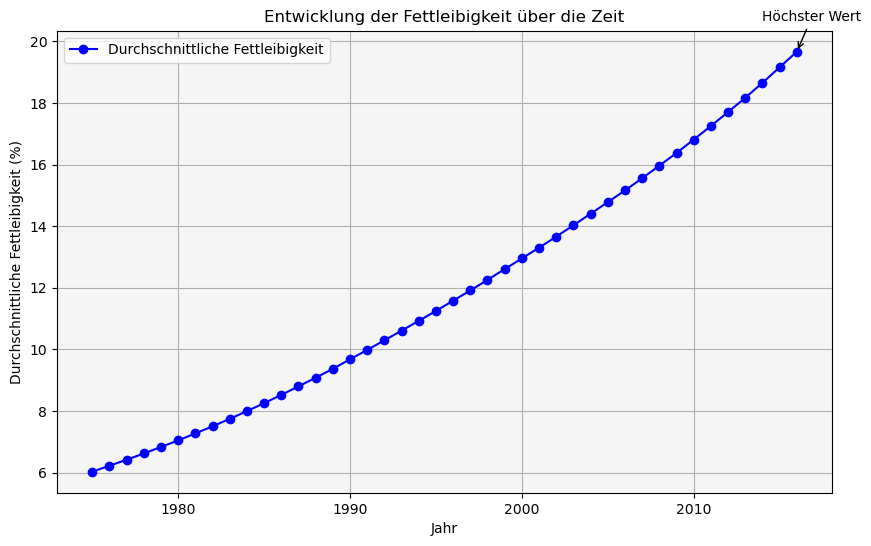

In [14]:
import matplotlib.pyplot as plt

# Datenplot erstellen
plt.figure(figsize=(10, 6))
plt.plot(mean_per_year_all.index, mean_per_year_all.values, 
         marker='o', linestyle='-', color='blue', label='Durchschnittliche Fettleibigkeit')

# Achsentitel und Diagrammtitel
plt.title('Entwicklung der Fettleibigkeit über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Fettleibigkeit (%)')

# Legende hinzufügen
plt.legend()

# Raster anzeigen
plt.grid(True)

# Zusätzliche Annotation hinzufügen (z.B. ein Punkt hervorheben)
plt.annotate('Höchster Wert', 
             xy=(mean_per_year_all.index[-1], mean_per_year_all.values[-1]), 
             xytext=(mean_per_year_all.index[-3], mean_per_year_all.values[-1] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Hintergrundfarbe der Achsen
plt.gca().set_facecolor('whitesmoke')

# Plot anzeigen
plt.show()


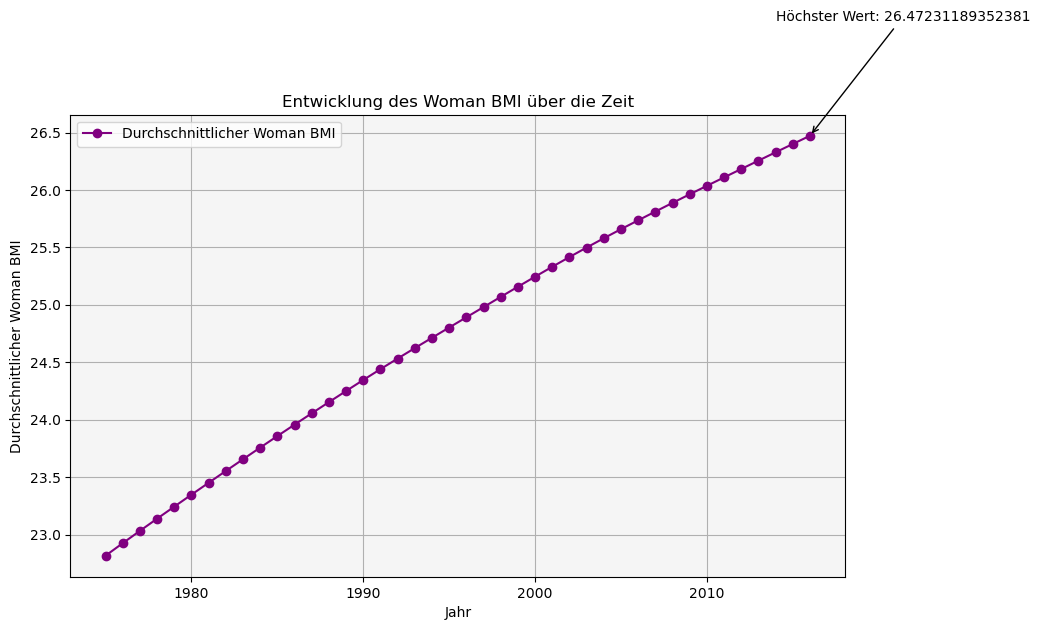

In [15]:
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(mean_per_year_woman.index, mean_per_year_woman.values, 
         marker='o', linestyle='-', color='purple', label='Durchschnittlicher Woman BMI')

# Titel und Achsentitel
plt.title('Entwicklung des Woman BMI über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Woman BMI')

# Legende hinzufügen
plt.legend()

# Raster aktivieren
plt.grid(True)

# Annotation hinzufügen (z.B. höchster BMI-Wert hervorheben)
max_value = mean_per_year_woman.values.max()
max_index = mean_per_year_woman.index[mean_per_year_woman.values.argmax()]
plt.annotate(f'Höchster Wert: {max_value}', 
             xy=(max_index, max_value), 
             xytext=(max_index - 2, max_value + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Hintergrundfarbe der Achse anpassen
plt.gca().set_facecolor('whitesmoke')

# Plot anzeigen
plt.show()


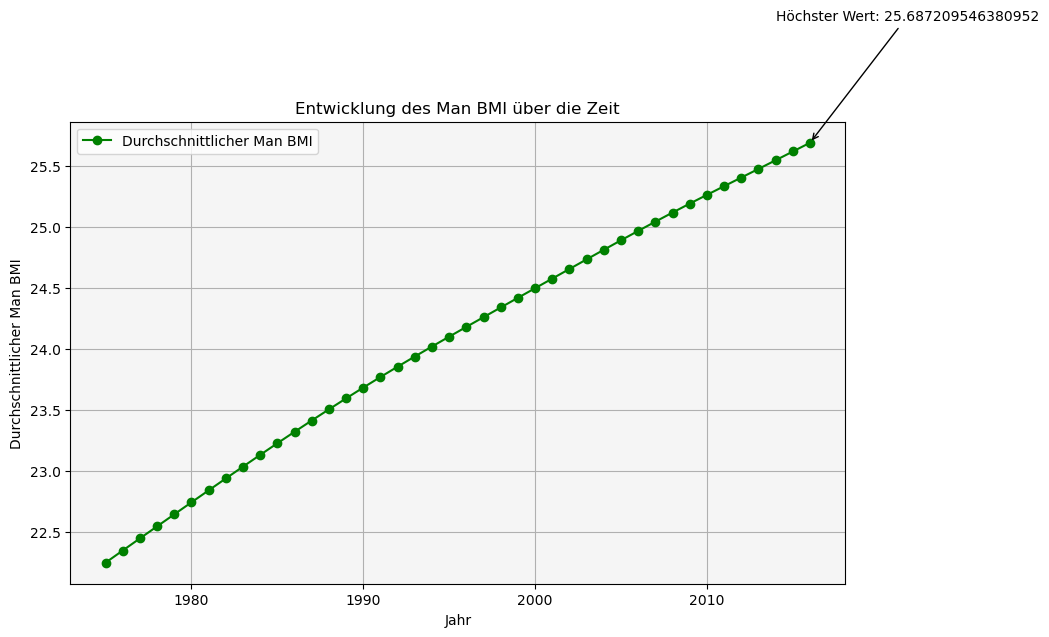

In [16]:
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(mean_per_year_man.index, mean_per_year_man.values, 
         marker='o', linestyle='-', color='green', label='Durchschnittlicher Man BMI')

# Titel und Achsentitel
plt.title('Entwicklung des Man BMI über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Man BMI')

# Legende hinzufügen
plt.legend()

# Raster aktivieren
plt.grid(True)

# Annotation hinzufügen (z.B. den höchsten BMI-Wert hervorheben)
max_value = mean_per_year_man.values.max()
max_index = mean_per_year_man.index[mean_per_year_man.values.argmax()]
plt.annotate(f'Höchster Wert: {max_value}', 
             xy=(max_index, max_value), 
             xytext=(max_index - 2, max_value + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Hintergrundfarbe für die Achse anpassen
plt.gca().set_facecolor('whitesmoke')

# Plot anzeigen
plt.show()


In [70]:
# Dictionary zur Speicherung der Durchschnittswerte
avg_dict = {year: df[df['Jahr'] == year]['Fettleibigkeit'].mean() for year in years}
print(avg_dict)


{1975: 6.027411167512691, 1976: 6.2218274111675145, 1977: 6.41725888324873, 1978: 6.619289340101521, 1979: 6.831979695431473, 1980: 7.044162436548223, 1981: 7.271065989847716, 1982: 7.503553299492385, 1983: 7.743147208121828, 1984: 7.995431472081218, 1985: 8.251776649746194, 1986: 8.520812182741116, 1987: 8.8, 1988: 9.078680203045685, 1989: 9.368020304568528, 1990: 9.676649746192892, 1991: 9.983248730964466, 1992: 10.293401015228426, 1993: 10.608629441624364, 1994: 10.925888324873096, 1995: 11.246700507614214, 1996: 11.581218274111675, 1997: 11.913197969543145, 1998: 12.256345177664974, 1999: 12.606091370558374, 2000: 12.952284263959388, 2001: 13.301522842639592, 2002: 13.660913705583758, 2003: 14.028426395939086, 2004: 14.406091370558375, 2005: 14.779695431472083, 2006: 15.160913705583756, 2007: 15.556852791878171, 2008: 15.965989847715736, 2009: 16.37715736040609, 2010: 16.81218274111675, 2011: 17.25228426395939, 2012: 17.706091370558376, 2013: 18.171065989847715, 2014: 18.6538071065

In [71]:
# Dictionary zur Speicherung der Durchschnittswerte df2
avg_dict = {year: df2[df2['Jahr'] == year]['Woman BMI'].mean() for year in years}
print(avg_dict)

{1975: 22.815293120619042, 1976: 22.9241802477619, 1977: 23.031595952952376, 1978: 23.137600738285713, 1979: 23.24255734752381, 1980: 23.346754982666667, 1981: 23.450199129190477, 1982: 23.552953701285713, 1983: 23.655087337333335, 1984: 23.756502500904762, 1985: 23.857129492142857, 1986: 23.956653283095235, 1987: 24.055104526190476, 1988: 24.152696391619045, 1989: 24.24951272052381, 1990: 24.345614917380953, 1991: 24.43972195609524, 1992: 24.532195942190473, 1993: 24.623176612714285, 1994: 24.712951589142858, 1995: 24.80233567804762, 1996: 24.89142934809524, 1997: 24.980337811714282, 1998: 25.069165374904767, 1999: 25.157627925285713, 2000: 25.24507259085714, 2001: 25.33133892595238, 2002: 25.41605285495238, 2003: 25.498909536571425, 2004: 25.57987708695238, 2005: 25.65873834585714, 2006: 25.73597589552381, 2007: 25.812173036714288, 2008: 25.887723173190476, 2009: 25.962537409285712, 2010: 26.036436405714284, 2011: 26.10982170866667, 2012: 26.182815187476187, 2013: 26.255685915285714,

In [72]:
# Dictionary zur Speicherung der Durchschnittswerte df2
avg_dict = {year: df3[df3['Jahr'] == year]['Man BMI'].mean() for year in years}
print(avg_dict)

{1975: 22.25229121247619, 1976: 22.351901213190477, 1977: 22.45090283728571, 1978: 22.549517924714287, 1979: 22.647890816904763, 1980: 22.74603592761905, 1981: 22.84385786095238, 1982: 22.94121179214286, 1983: 23.038022751904762, 1984: 23.134107658190477, 1985: 23.229228317857146, 1986: 23.322938882571425, 1987: 23.415285139714285, 1988: 23.506425483, 1989: 23.59623427595238, 1990: 23.684723951, 1991: 23.7711451267619, 1992: 23.855723049428573, 1993: 23.938829697285716, 1994: 24.02058278676191, 1995: 24.101182015666666, 1996: 24.181164705476192, 1997: 24.260510929380953, 1998: 24.339796018666668, 1999: 24.418841530285714, 2000: 24.497432771619053, 2001: 24.576039304142856, 2002: 24.654702954571427, 2003: 24.733390971476197, 2004: 24.811827300238093, 2005: 24.889375833095237, 2006: 24.96603529547619, 2007: 25.04166214504762, 2008: 25.116178088666665, 2009: 25.189274564, 2010: 25.260858823190475, 2011: 25.33188155885714, 2012: 25.402458171190474, 2013: 25.47298017552381, 2014: 25.5440710

### Länder mit extremen Werten identifizieren

In [13]:
mean_per_country_all = df.groupby('Gebiet')['Fettleibigkeit'].mean()

# Top 5 Länder
top_5_all = mean_per_country_all.sort_values(ascending=False).head(5)
print("Top 5 Länder mit der höchsten Fettleibigkeit:")
print(top_5_all)

# Bottom 5 Länder
bottom_5_all = mean_per_country_all.sort_values().head(5)
print("Bottom 5 Länder mit der niedrigsten Fettleibigkeit:")
print(bottom_5_all)


Top 5 Länder mit der höchsten Fettleibigkeit:
Gebiet
Nauru               51.373810
Palau               39.876190
Cook Islands        39.450000
Marshall Islands    38.183333
Tuvalu              32.857143
Name: Fettleibigkeit, dtype: float64
Bottom 5 Länder mit der niedrigsten Fettleibigkeit:
Gebiet
Vietnam       0.630952
East Timor    1.109524
Bangladesh    1.145238
Cambodia      1.226190
Nepal         1.361905
Name: Fettleibigkeit, dtype: float64


In [14]:
mean_per_country_woman = df2.groupby('Gebiet')['Woman BMI'].mean()

# Top 5 Länder
top_5_woman = mean_per_country_woman.sort_values(ascending=False).head(5)
print("Top 5 Länder mit der Woman BMI:")
print(top_5_woman)

# Bottom 5 Länder
bottom_5_woman = mean_per_country_woman.sort_values().head(5)
print("Bottom 5 Länder mit der niedrigsten Woman BMI")
print(bottom_5_woman)


Top 5 Länder mit der Woman BMI:
Gebiet
American Samoa    34.386760
Nauru             33.922281
Tonga             31.890939
Cook Islands      31.500452
Samoa             31.275493
Name: Woman BMI, dtype: float64
Bottom 5 Länder mit der niedrigsten Woman BMI
Gebiet
Bangladesh    19.244267
East Timor    19.474130
Ethiopia      19.542715
Vietnam       19.697406
Nepal         19.727095
Name: Woman BMI, dtype: float64


In [15]:
mean_per_country_man = df3.groupby('Gebiet')['Man BMI'].mean()

# Top 5 Länder
top_5_man = mean_per_country_man.sort_values(ascending=False).head(5)
print("Top 5 Länder mit der Man BMI:")
print(top_5_man)

# Bottom 5 Länder
bottom_5_man = mean_per_country_man.sort_values().head(5)
print("Bottom 5 Länder mit der niedrigsten Man BMI")
print(bottom_5_man)

Top 5 Länder mit der Man BMI:
Gebiet
Nauru             32.676798
American Samoa    32.457527
Cook Islands      30.772765
Tokelau           30.276376
Niue              29.849304
Name: Man BMI, dtype: float64
Bottom 5 Länder mit der niedrigsten Man BMI
Gebiet
Ethiopia      19.262044
East Timor    19.686377
Eritrea       19.709991
Vietnam       19.810492
Rwanda        19.911151
Name: Man BMI, dtype: float64


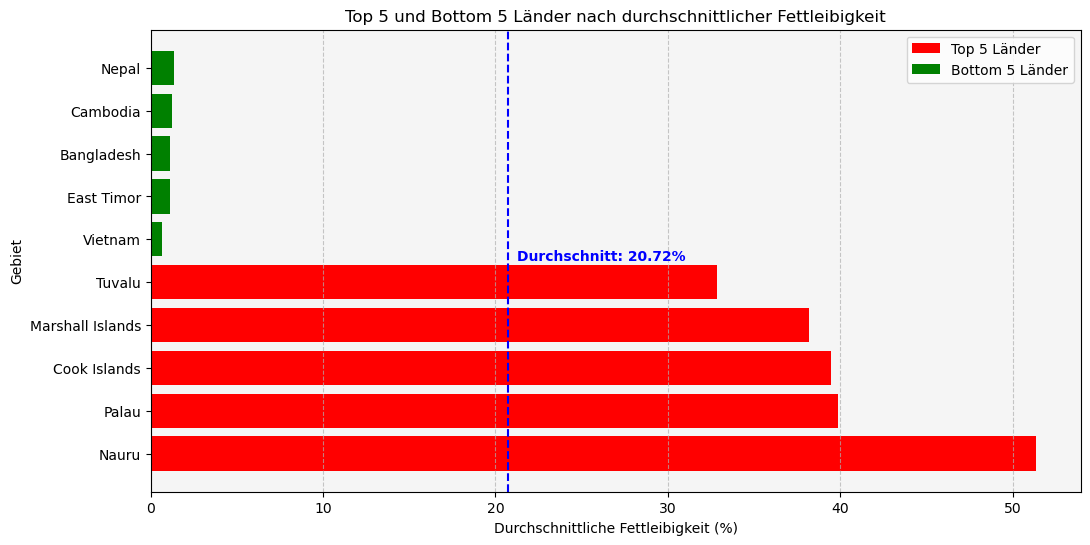

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot der Top 5 Länder
plt.barh(top_5_all.index, top_5_all.values, color='red', label='Top 5 Länder')

# Plot der Bottom 5 Länder
plt.barh(bottom_5_all.index, bottom_5_all.values, color='green', label='Bottom 5 Länder')

# Titel und Achsentitel
plt.title('Top 5 und Bottom 5 Länder nach durchschnittlicher Fettleibigkeit')
plt.xlabel('Durchschnittliche Fettleibigkeit (%)')
plt.ylabel('Gebiet')

# Legende hinzufügen
plt.legend()

# Linien hinzufügen (z.B. Durchschnittslinie)
mean_value = (top_5_all.values.mean() + bottom_5_all.values.mean()) / 2
plt.axvline(mean_value, color='blue', linestyle='--', label='Globaler Durchschnitt')

# Zusätzliche Texte hinzufügen
plt.text(mean_value + 0.5, len(top_5_all) - 0.5, f'Durchschnitt: {mean_value:.2f}%', 
         color='blue', fontsize=10, fontweight='bold')

# Hintergrundfarbe der Achse
plt.gca().set_facecolor('whitesmoke')

# Gitter hinzufügen
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Plot anzeigen
plt.show()


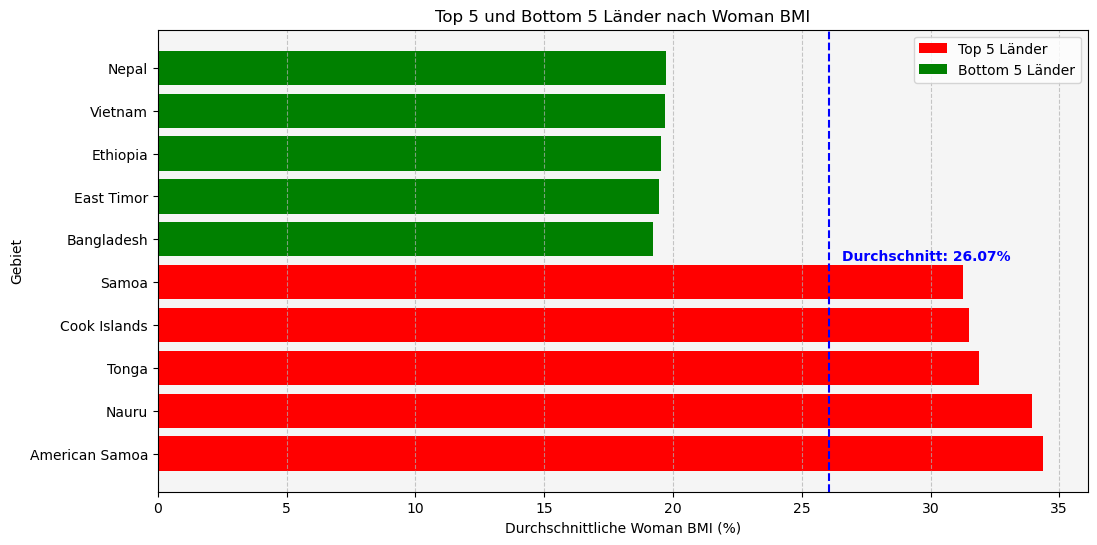

In [17]:
import matplotlib.pyplot as plt

# Diagramm erstellen
plt.figure(figsize=(12, 6))

# Plot der Top 5 Länder
plt.barh(top_5_woman.index, top_5_woman.values, color='red', label='Top 5 Länder')

# Plot der Bottom 5 Länder
plt.barh(bottom_5_woman.index, bottom_5_woman.values, color='green', label='Bottom 5 Länder')

# Titel und Achsentitel
plt.title('Top 5 und Bottom 5 Länder nach Woman BMI')
plt.xlabel('Durchschnittliche Woman BMI (%)')
plt.ylabel('Gebiet')

# Legende hinzufügen
plt.legend()

# Durchschnittslinie hinzufügen
mean_value = (top_5_woman.values.mean() + bottom_5_woman.values.mean()) / 2
plt.axvline(mean_value, color='blue', linestyle='--', label='Globaler Durchschnitt')

# Annotation (Text) für den Durchschnittswert
plt.text(mean_value + 0.5, len(top_5_woman) - 0.5, 
         f'Durchschnitt: {mean_value:.2f}%', 
         color='blue', fontsize=10, fontweight='bold')

# Hintergrundfarbe anpassen
plt.gca().set_facecolor('whitesmoke')

# Gitter hinzufügen für bessere Lesbarkeit
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()


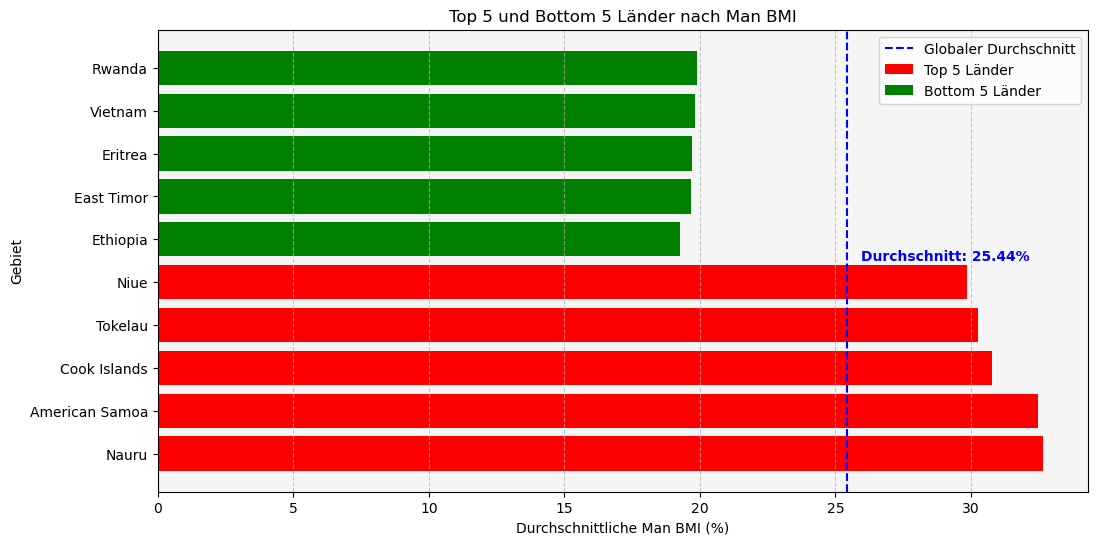

In [24]:
import matplotlib.pyplot as plt

# Diagramm erstellen
plt.figure(figsize=(12, 6))

# Plot der Top 5 Länder
plt.barh(top_5_man.index, top_5_man.values, color='red', label='Top 5 Länder')

# Plot der Bottom 5 Länder
plt.barh(bottom_5_man.index, bottom_5_man.values, color='green', label='Bottom 5 Länder')

# Titel und Achsentitel
plt.title('Top 5 und Bottom 5 Länder nach Man BMI')
plt.xlabel('Durchschnittliche Man BMI (%)')
plt.ylabel('Gebiet')

# Durchschnittslinie hinzufügen
mean_value = (top_5_man.values.mean() + bottom_5_man.values.mean()) / 2
plt.axvline(mean_value, color='blue', linestyle='--', label='Globaler Durchschnitt')

# Annotation des Durchschnitts
plt.text(mean_value + 0.5, len(top_5_man) - 0.5, 
         f'Durchschnitt: {mean_value:.2f}%', 
         color='blue', fontsize=10, fontweight='bold')

# Legende hinzufügen
plt.legend()

# Hintergrundfarbe anpassen
plt.gca().set_facecolor('whitesmoke')

# Gitter für bessere Lesbarkeit
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()


In [25]:
# Beispiel: Nur Länder mit einer Fettleibigkeitsrate > 30%
high_obesity = df[df['Fettleibigkeit'] > 30]
if not high_obesity.empty:
    print("Länder mit einer Fettleibigkeitsrate über 30%:")
    print(high_obesity)


Länder mit einer Fettleibigkeitsrate über 30%:
             Gebiet Code  Jahr  Fettleibigkeit
461       Australia  AUS  2016            30.4
584         Bahamas  BHS  2013            30.3
585         Bahamas  BHS  2014            30.9
586         Bahamas  BHS  2015            31.5
587         Bahamas  BHS  2016            32.1
...             ...  ...   ...             ...
7891  United States  USA  2012            34.7
7892  United States  USA  2013            35.4
7893  United States  USA  2014            36.0
7894  United States  USA  2015            36.7
7895  United States  USA  2016            37.3

[332 rows x 4 columns]


In [26]:
# Beispiel: Nur Länder mit einer BMI > 30
high_obesity = df2[df2['Woman BMI'] > 30]
if not high_obesity.empty:
    print("Länder mit einer BMI über 30(female):")
    print(high_obesity)

Länder mit einer BMI über 30(female):
              Gebiet Code  Jahr  Woman BMI
126   American Samoa  ASM  1975  32.258886
127   American Samoa  ASM  1976  32.403470
128   American Samoa  ASM  1977  32.547337
129   American Samoa  ASM  1978  32.689690
130   American Samoa  ASM  1979  32.830923
...              ...  ...   ...        ...
8227          Tuvalu  TUV  2012  31.626598
8228          Tuvalu  TUV  2013  31.690564
8229          Tuvalu  TUV  2014  31.752743
8230          Tuvalu  TUV  2015  31.813266
8231          Tuvalu  TUV  2016  31.871330

[368 rows x 4 columns]


In [27]:
# Beispiel: Nur Länder mit einer BMI > 30
high_obesity = df3[df3['Man BMI'] > 30]
if not high_obesity.empty:
    print("Länder mit einer BMI über 30(male):")
    print(high_obesity)

Länder mit einer BMI über 30(male):
              Gebiet Code  Jahr    Man BMI
130   American Samoa  ASM  1979  30.148287
131   American Samoa  ASM  1980  30.424760
132   American Samoa  ASM  1981  30.699517
133   American Samoa  ASM  1982  30.971502
134   American Samoa  ASM  1983  31.238396
...              ...  ...   ...        ...
8021           Tonga  TON  2016  30.723402
8228          Tuvalu  TUV  2013  30.046837
8229          Tuvalu  TUV  2014  30.109515
8230          Tuvalu  TUV  2015  30.171987
8231          Tuvalu  TUV  2016  30.233211

[192 rows x 4 columns]


### Verteilung der Fettleibigkeitswerte analysieren

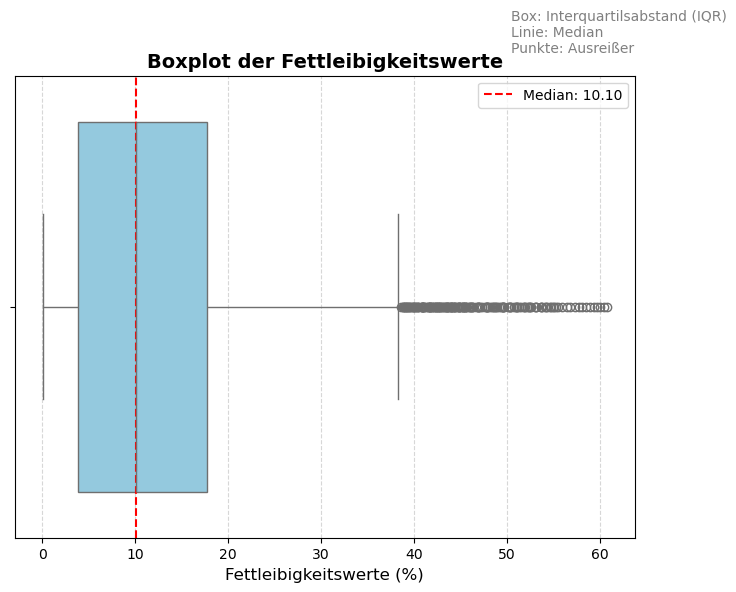

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fettleibigkeit'], color='skyblue')

# Titel und Achsentitel hinzufügen
plt.title('Boxplot der Fettleibigkeitswerte', fontsize=14, fontweight='bold')
plt.xlabel('Fettleibigkeitswerte (%)', fontsize=12)

# Legende simulieren (Boxplots haben standardmäßig keine Legenden)
plt.text(0.8, 1.05, 'Box: Interquartilsabstand (IQR)\nLinie: Median\nPunkte: Ausreißer', 
         transform=plt.gca().transAxes, fontsize=10, color='gray')

# Zusätzliche vertikale Linie für den Median-Wert
median_value = df['Fettleibigkeit'].median()
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')

# Legende anzeigen
plt.legend()

# Raster hinzufügen
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Plot anzeigen
plt.show()


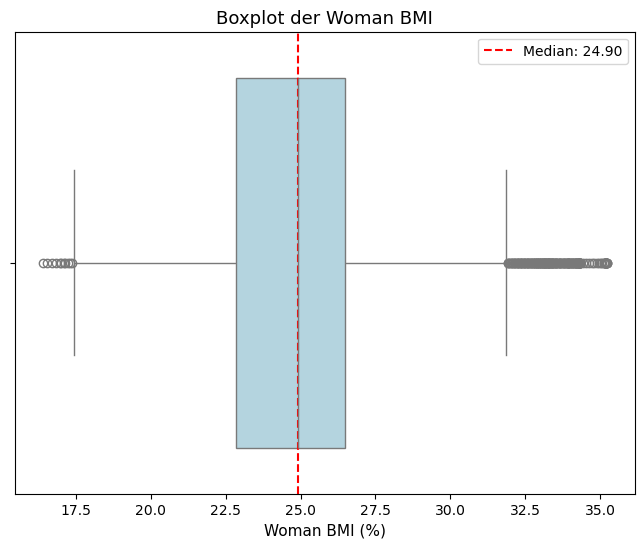

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['Woman BMI'], color='lightblue')

# Titel und Achsentitel hinzufügen
plt.title('Boxplot der Woman BMI', fontsize=13)
plt.xlabel('Woman BMI (%)', fontsize=11)

# Medianlinie hervorheben
median_value = df2['Woman BMI'].median()
plt.axvline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()


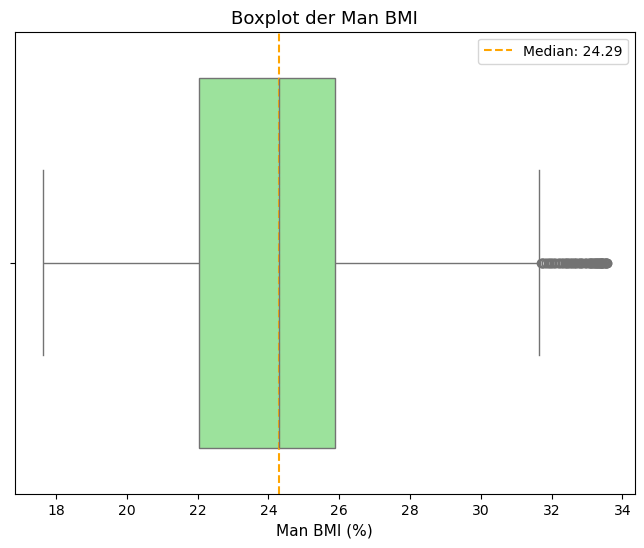

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot erstellen
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3['Man BMI'], color='lightgreen')  # Farbe leicht angepasst

# Titel und Achsentitel hinzufügen
plt.title('Boxplot der Man BMI', fontsize=13)
plt.xlabel('Man BMI (%)', fontsize=11)

# Median-Linie hervorheben
median_value = df3['Man BMI'].median()
plt.axvline(median_value, color='orange', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()


In [ ]:
# Globaler Durchschnitt der BMI berechnen
global_mean = df2['Woman BMI'].mean()
print(f"Der globale Durchschnitt der Woman BMI beträgt: {global_mean:.2f}")


Der globale Durchschnitt der Woman BMI beträgt: 24.78


In [47]:
# Globaler Durchschnitt der BMI berechnen
global_mean = df3['Man BMI'].mean()
print(f"Der globale Durchschnitt der Man BMI beträgt: {global_mean:.2f}")

Der globale Durchschnitt der Man BMI beträgt: 24.08


In [48]:
# Globaler Durchschnitt der Fettleibigkeitsrate berechnen
global_mean = df['Fettleibigkeit'].mean()
print(f"Der globale Durchschnitt der Fettleibigkeitsrate beträgt: {global_mean:.2f}%")

Der globale Durchschnitt der Fettleibigkeitsrate beträgt: 11.87%


In [18]:
import pandas as pd

# Länder aus df2 mit Woman BMI > 30 für das Jahr 2016 filtern
bmi_ueber_30_frauen_2016 = df2[(df2['Woman BMI'] > 30) & (df2['Jahr'] == 2016)]

# Nur die Länder extrahieren und doppelte Einträge entfernen
laender_frauen_2016 = bmi_ueber_30_frauen_2016['Gebiet'].drop_duplicates()

# Anzahl der Länder und die Liste der Länder ausgeben
anzahl_frauen_2016 = len(laender_frauen_2016)
print(f"Anzahl der Länder mit durchschnittlichem Woman BMI > 30 im Jahr 2016: {anzahl_frauen_2016}")
print("Liste der Länder (Frauen, 2016):")
print(laender_frauen_2016.tolist())


Anzahl der Länder mit durchschnittlichem Woman BMI > 30 im Jahr 2016: 19
Liste der Länder (Frauen, 2016):
['American Samoa', 'Belize', 'Cook Islands', 'Egypt', 'Jordan', 'Kiribati', 'Kuwait', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'Niue', 'Palestine', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Tokelau', 'Tonga', 'Tuvalu']


In [19]:
import pandas as pd

# Länder aus df3 mit Man BMI > 30 für das Jahr 2016 filtern
bmi_ueber_30_maenner_2016 = df3[(df3['Man BMI'] > 30) & (df3['Jahr'] == 2016)]

# Nur die Länder extrahieren und doppelte Einträge entfernen
laender_maenner_2016 = bmi_ueber_30_maenner_2016['Gebiet'].drop_duplicates()

# Anzahl der Länder und die Liste der Länder ausgeben
anzahl_maenner_2016 = len(laender_maenner_2016)
print(f"Anzahl der Länder mit durchschnittlichem Man BMI > 30 im Jahr 2016: {anzahl_maenner_2016}")
print("Liste der Länder (Männer, 2016):")
print(laender_maenner_2016.tolist())


Anzahl der Länder mit durchschnittlichem Man BMI > 30 im Jahr 2016: 8
Liste der Länder (Männer, 2016):
['American Samoa', 'Cook Islands', 'Nauru', 'Niue', 'Samoa', 'Tokelau', 'Tonga', 'Tuvalu']


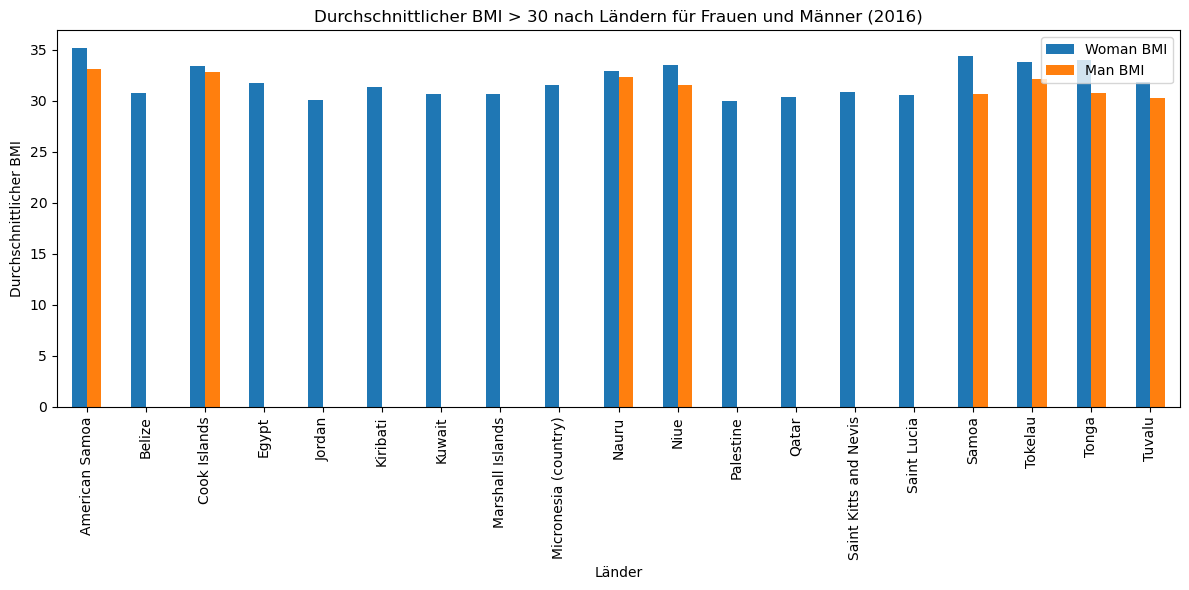

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Länder aus df2 mit Woman BMI > 30 für das Jahr 2016 filtern
bmi_ueber_30_frauen_2016 = df2[(df2['Woman BMI'] > 30) & (df2['Jahr'] == 2016)]
laender_frauen_2016 = bmi_ueber_30_frauen_2016[['Gebiet', 'Woman BMI']].drop_duplicates()

# Länder aus df3 mit Man BMI > 30 für das Jahr 2016 filtern
bmi_ueber_30_maenner_2016 = df3[(df3['Man BMI'] > 30) & (df3['Jahr'] == 2016)]
laender_maenner_2016 = bmi_ueber_30_maenner_2016[['Gebiet', 'Man BMI']].drop_duplicates()

# Zusammenführen der beiden Tabellen zu einer gemeinsamen Tabelle
bmi_ueber_30_2016 = pd.merge(laender_frauen_2016, laender_maenner_2016, on='Gebiet', how='outer')

# Balkendiagramm erstellen
bmi_ueber_30_2016.plot(
    x='Gebiet', 
    kind='bar', 
    stacked=False, 
    figsize=(12, 6), 
    title='Durchschnittlicher BMI > 30 nach Ländern für Frauen und Männer (2016)'
)
plt.xlabel('Länder')
plt.ylabel('Durchschnittlicher BMI')
plt.legend(['Woman BMI', 'Man BMI'])
plt.tight_layout()
plt.show()


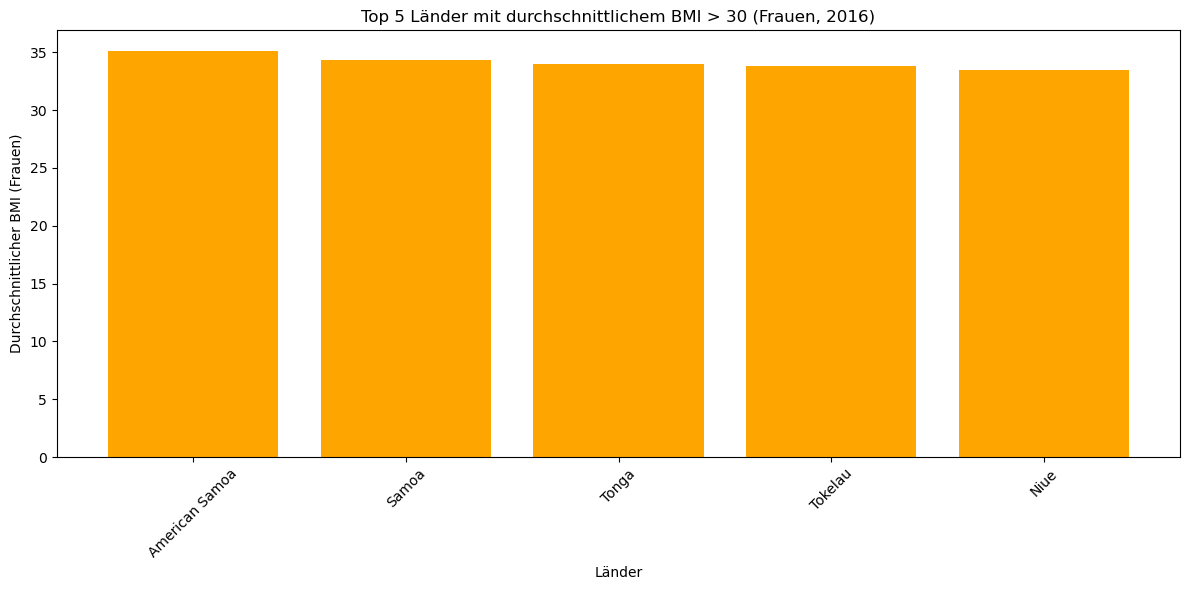

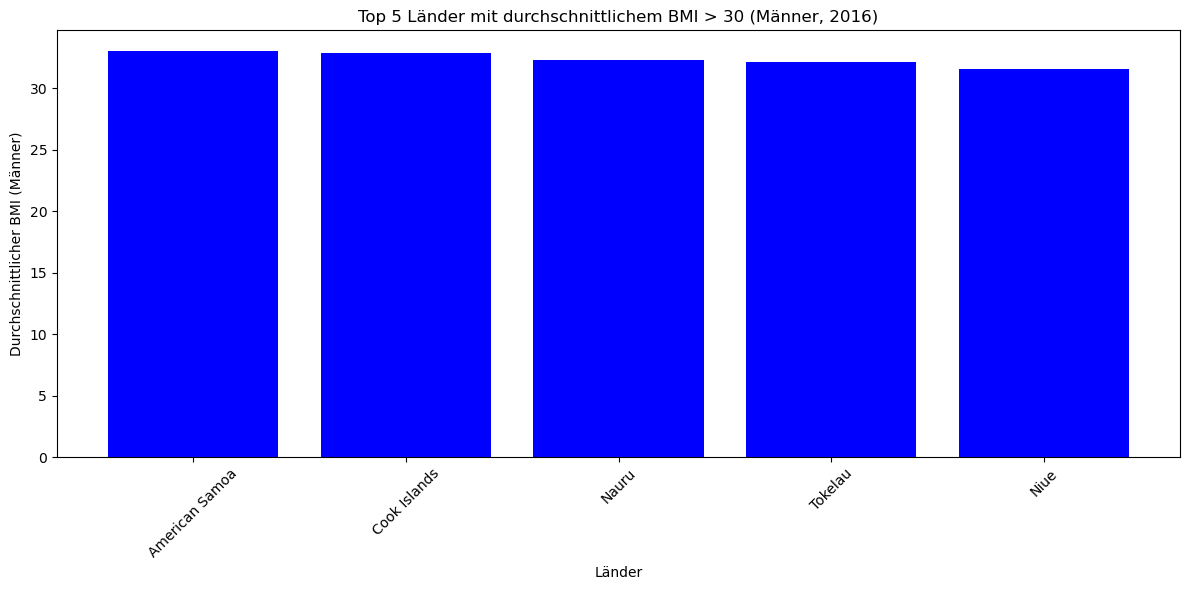

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Top 5 Länder für Frauen mit BMI > 30 im Jahr 2016
bmi_ueber_30_frauen_2016 = df2[(df2['Woman BMI'] > 30) & (df2['Jahr'] == 2016)]
top5_frauen = bmi_ueber_30_frauen_2016[['Gebiet', 'Woman BMI']].drop_duplicates().sort_values(by='Woman BMI', ascending=False).head(5)

# Top 5 Länder für Männer mit BMI > 30 im Jahr 2016
bmi_ueber_30_maenner_2016 = df3[(df3['Man BMI'] > 30) & (df3['Jahr'] == 2016)]
top5_maenner = bmi_ueber_30_maenner_2016[['Gebiet', 'Man BMI']].drop_duplicates().sort_values(by='Man BMI', ascending=False).head(5)

# Diagramm für Frauen
plt.figure(figsize=(12, 6))
plt.bar(top5_frauen['Gebiet'], top5_frauen['Woman BMI'], color='orange')
plt.title('Top 5 Länder mit durchschnittlichem BMI > 30 (Frauen, 2016)')
plt.xlabel('Länder')
plt.ylabel('Durchschnittlicher BMI (Frauen)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Diagramm für Männer
plt.figure(figsize=(12, 6))
plt.bar(top5_maenner['Gebiet'], top5_maenner['Man BMI'], color='blue')
plt.title('Top 5 Länder mit durchschnittlichem BMI > 30 (Männer, 2016)')
plt.xlabel('Länder')
plt.ylabel('Durchschnittlicher BMI (Männer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
